<a href="https://colab.research.google.com/github/karthikpavan-vk/insurance-claim-analysis/blob/main/Insurance_Claim_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Insurance claims data.csv")
df['claim_id'] = df['policy_id']

In [12]:

# Simulate claim_date
np.random.seed(42)
df['claim_date'] = pd.to_datetime(np.random.choice(pd.date_range("2018-01-01", "2023-12-31"), size=len(df)))

# Simulate claim_amount
df['claim_amount'] = np.abs(np.random.normal(loc=35000, scale=10000, size=len(df)))

# Create additional fields
df['vehicle_age_group'] = pd.cut(df['vehicle_age'], bins=[0, 5, 10, 15, 20], labels=['0–5', '6–10', '11–15', '16–20'])
df['customer_age_group'] = pd.cut(df['customer_age'], bins=[18, 25, 35, 45, 60, 100], labels=['18–25', '26–35', '36–45', '46–60', '60+'])
df['claim_status_label'] = df['claim_status'].map({0: 'Rejected', 1: 'Approved'})
df.rename(columns={'region_code': 'region'}, inplace=True)
df['year'] = df['claim_date'].dt.year

sns.set(style="whitegrid")

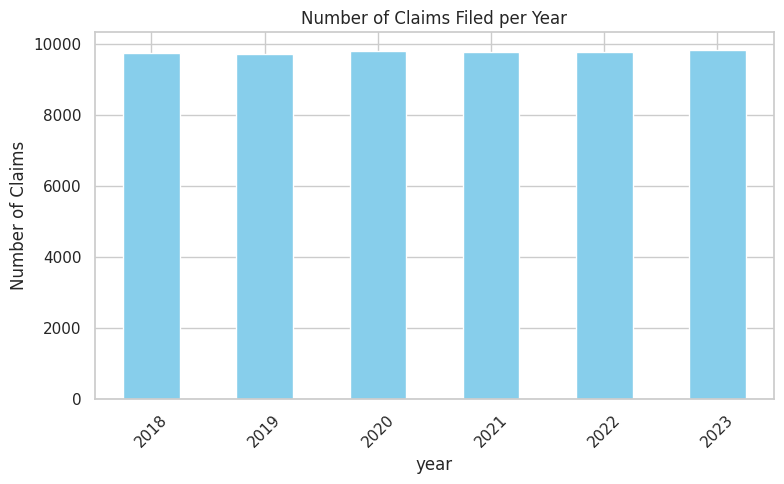

In [13]:
# 1. Claims filed per year
claims_per_year = df.groupby('year')['claim_id'].count()
plt.figure(figsize=(8, 5))
claims_per_year.plot(kind='bar', color='skyblue', title='Number of Claims Filed per Year')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1084804349.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Approved', 'Rejected'], y=[approval_counts, rejection_counts], palette='Set2')


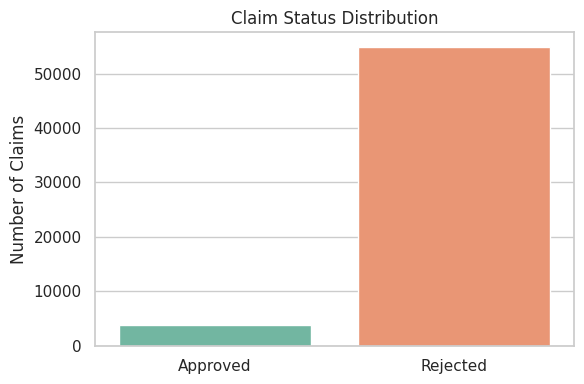

In [14]:
# 2. Claim status distribution
rejection_counts = df[df['claim_status_label'] == 'Rejected'].shape[0]
approval_counts = df[df['claim_status_label'] == 'Approved'].shape[0]
plt.figure(figsize=(6, 4))
sns.barplot(x=['Approved', 'Rejected'], y=[approval_counts, rejection_counts], palette='Set2')
plt.title('Claim Status Distribution')
plt.ylabel('Number of Claims')
plt.tight_layout()
plt.show()

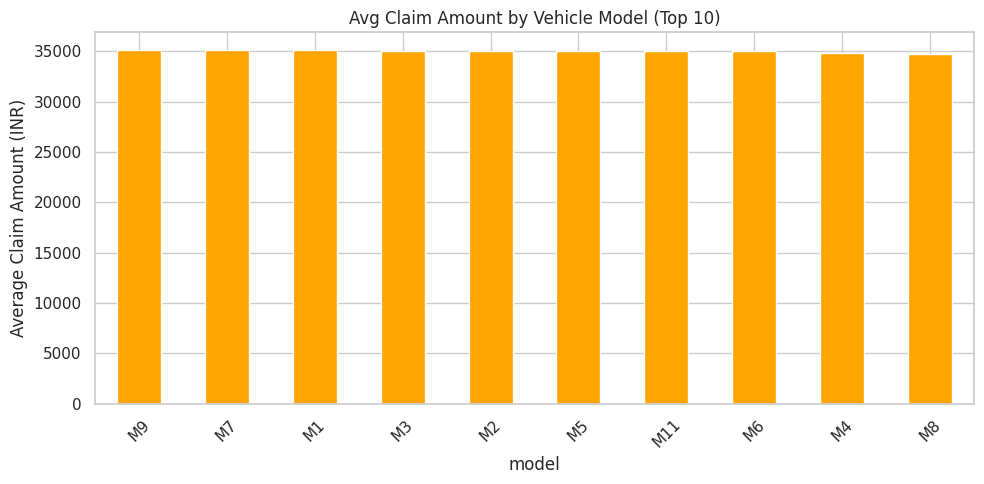

In [15]:
# 3. Avg claim amount by vehicle model
avg_by_model = df.groupby('model')['claim_amount'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
avg_by_model.plot(kind='bar', color='orange', title='Avg Claim Amount by Vehicle Model (Top 10)')
plt.ylabel('Average Claim Amount (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1895175830.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_by_vehicle_age = df.groupby('vehicle_age_group')['claim_amount'].mean()


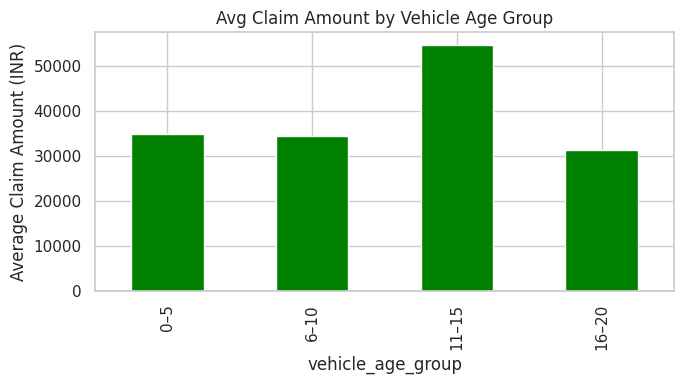

In [16]:
# 3.5 Avg claim amount by vehicle age group
avg_by_vehicle_age = df.groupby('vehicle_age_group')['claim_amount'].mean()
plt.figure(figsize=(7, 4))
avg_by_vehicle_age.plot(kind='bar', color='green', title='Avg Claim Amount by Vehicle Age Group')
plt.ylabel('Average Claim Amount (INR)')
plt.tight_layout()
plt.show()

/tmp/ipython-input-959797455.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  claims_by_age = df.groupby('customer_age_group')['claim_id'].count()


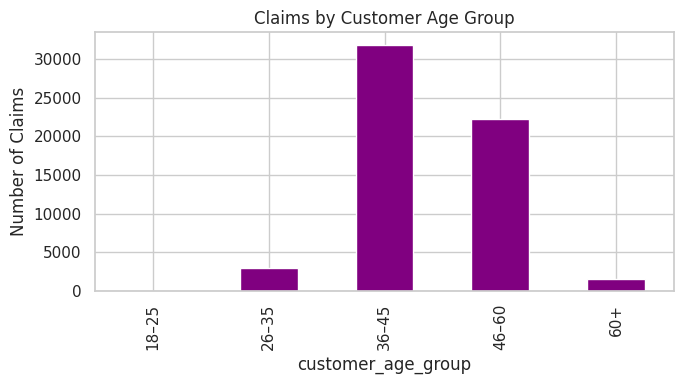

In [17]:
# 4. Claims by customer age group
claims_by_age = df.groupby('customer_age_group')['claim_id'].count()
plt.figure(figsize=(7, 4))
claims_by_age.plot(kind='bar', color='purple', title='Claims by Customer Age Group')
plt.ylabel('Number of Claims')
plt.tight_layout()
plt.show()

/tmp/ipython-input-4037334806.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_claims.values, y=region_claims.index, palette='coolwarm')


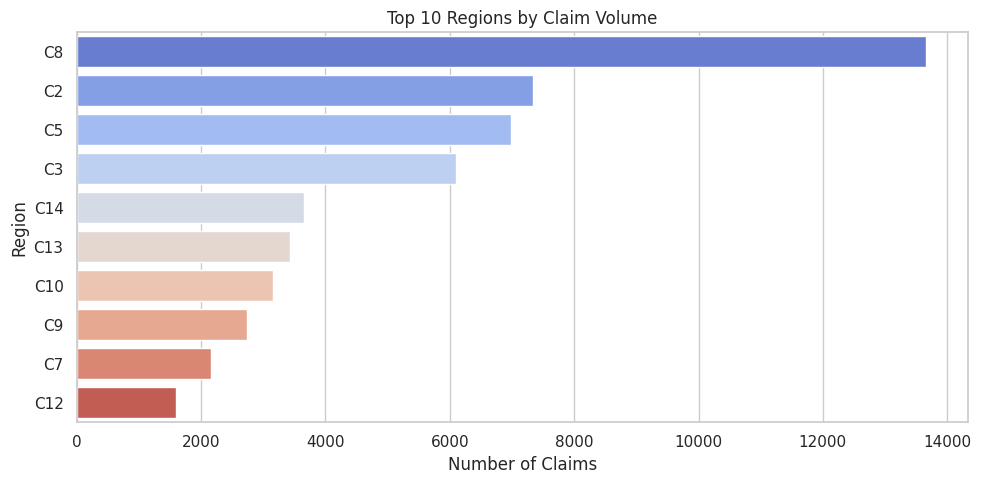

In [18]:
# 5. Regional breakdown of claims
region_claims = df.groupby('region')['claim_id'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=region_claims.values, y=region_claims.index, palette='coolwarm')
plt.title('Top 10 Regions by Claim Volume')
plt.xlabel('Number of Claims')
plt.ylabel('Region')
plt.tight_layout()
plt.show()
